## Data and Libraries

### Import Libraries

In [72]:
# Import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, learning_curve, cross_val_score

from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, precision_score
from sklearn.metrics import f1_score, precision_recall_curve, roc_auc_score, roc_curve


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

### Import Data

In [2]:
# Import music and member data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
songs_df = pd.read_csv('songs.csv')
members_df = pd.read_csv('members.csv')
song_extra_df = pd.read_csv('song_extra_info.csv')

In [3]:
# Print columns of each dataframe
print('Columns of train : ', train_df.columns)
print('Columns of test :', test_df.columns) # Only used for Kaggle competition
print('Columns of songs : ', songs_df.columns)
print('Columns of members : ', members_df.columns)
print('Columns of songs_extra_info : ', song_extra_df.columns)

Columns of train :  Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')
Columns of test : Index(['id', 'msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type'],
      dtype='object')
Columns of songs :  Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')
Columns of members :  Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')
Columns of songs_extra_info :  Index(['song_id', 'name', 'isrc'], dtype='object')


In [4]:
# Print size of each dataframe
print('Shape of train file is : ', train_df.shape)
print('Shape of test file is : ', test_df.shape)
print('Shape of songs file is : ', songs_df.shape)
print('Shape of members file is : ', members_df.shape)
print('Shape of songs_extra_info file is : ', song_extra_df.shape)

Shape of train file is :  (7377418, 6)
Shape of test file is :  (2556790, 6)
Shape of songs file is :  (2296320, 7)
Shape of members file is :  (34403, 7)
Shape of songs_extra_info file is :  (2295971, 3)


## Exploratory Data Analysis (EDA)

### Train Data

In [5]:
# View top 5 rows of dataframe
train_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [6]:
# Get info on each column
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   msno                object
 1   song_id             object
 2   source_system_tab   object
 3   source_screen_name  object
 4   source_type         object
 5   target              int64 
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [7]:
# Find target category proportions - needs be close to equal
print('0 : {:.2f}%'.format(train_df['target'].value_counts()[0]/train_df.shape[0] * 100))
print('1 : {:.2f}%'.format(train_df['target'].value_counts()[1]/train_df.shape[0] * 100))

0 : 49.65%
1 : 50.35%


In [8]:
# Get a breakdown of unique values in source_system_tab
unique_values = train_df.source_system_tab.dropna().unique()
for value in unique_values:
    print(str(value) + ' : {:.2f}%'.format(train_df['source_system_tab'].value_counts()[value]/train_df.shape[0] * 100))

explore : 2.28%
my library : 49.95%
search : 8.45%
discover : 29.54%
radio : 6.46%
listen with : 2.88%
notification : 0.08%
settings : 0.03%


In [9]:
# Get a breakdown of unique values in source_screen_name
unique_values = train_df.source_screen_name.dropna().unique()
for value in unique_values:
    print(str(value) + ' : {:.2f}%'.format(train_df['source_screen_name'].value_counts()[value]/train_df.shape[0] * 100))

Explore : 0.98%
Local playlist more : 43.76%
My library : 1.03%
Online playlist more : 17.55%
Album more : 5.70%
Discover Feature : 3.31%
Unknown : 0.73%
Discover Chart : 2.90%
Radio : 6.43%
Artist more : 3.42%
Search : 4.05%
Others profile more : 2.74%
Search Trends : 0.18%
Discover Genre : 1.11%
My library_Search : 0.09%
Search Home : 0.18%
Discover New : 0.22%
Self profile more : 0.00%
Concert : 0.00%
Payment : 0.00%


In [10]:
# Get a breakdown of unique values in source_type
unique_values = train_df.source_type.dropna().unique()
for value in unique_values:
    print(str(value) + ' : {:.2f}%'.format(train_df['source_type'].value_counts()[value]/train_df.shape[0] * 100))

online-playlist : 26.67%
local-playlist : 14.63%
local-library : 30.65%
top-hits-for-artist : 5.74%
album : 6.47%
song-based-playlist : 2.85%
radio : 6.55%
song : 3.32%
listen-with : 2.61%
artist : 0.04%
topic-article-playlist : 0.15%
my-daily-playlist : 0.01%


### Songs and Song Extra Data

In [11]:
# View top 5 rows of dataframe
songs_df.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [12]:
# View top 5 rows of dataframe
song_extra_df.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [13]:
# Get a breakdown of unique values in language
unique_values = songs_df.language.dropna().unique()
for value in unique_values:
    print(str(value) + ' : {:.2f}%'.format(songs_df['language'].value_counts()[value]/songs_df.shape[0] * 100))

3.0 : 4.63%
31.0 : 1.71%
52.0 : 58.21%
17.0 : 4.03%
10.0 : 0.67%
-1.0 : 27.85%
24.0 : 1.82%
59.0 : 0.35%
45.0 : 0.63%
38.0 : 0.10%


### Member Data

In [14]:
# View top 5 rows of dataframe
members_df.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [15]:
# Get basic statistics for continuous features
members_df.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [16]:
# Get a breakdown of unique values in language
unique_values = members_df.city.dropna().unique()
for value in unique_values:
    print(str(value) + ' : {:.2f}%'.format(members_df['city'].value_counts()[value]/members_df.shape[0] * 100))

1 : 56.52%
13 : 9.87%
12 : 1.43%
15 : 4.43%
5 : 7.66%
6 : 2.65%
4 : 5.03%
11 : 0.83%
18 : 0.75%
22 : 4.26%
14 : 2.06%
8 : 0.84%
20 : 0.08%
3 : 0.59%
17 : 0.44%
10 : 0.63%
16 : 0.10%
9 : 0.90%
21 : 0.62%
7 : 0.27%
19 : 0.03%


### Merge Data

In [17]:
# Merge songs_df and song_extra_df
songs_all_df = songs_df.merge(song_extra_df, on='song_id')

In [18]:
# Merge train, member, and song data
train_members = train_df.merge(members_df, on='msno', how='left')
raw_data_df = train_members.merge(songs_all_df, on='song_id', how='left')

In [19]:
# View top 5 rows of dataframe
raw_data_df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,Disco Africa,GBUQH1000063
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003


In [20]:
# Clear original data from memory
del train_df
del test_df
del songs_df
del members_df
del song_extra_df

### Missing Data

In [21]:
# Function to find percentage of missing values in columns
def missing_data(df):
    for col in df.columns:
        nan_count = df[col].isnull().sum()
        total = df.shape[0]
        percentage = nan_count/total * 100
        print(str(col) + ' has {:.2f}% missing values'.format(percentage))

In [22]:
# Find Percentage of missing values in columns
missing_data(raw_data_df)

msno has 0.00% missing values
song_id has 0.00% missing values
source_system_tab has 0.34% missing values
source_screen_name has 5.62% missing values
source_type has 0.29% missing values
target has 0.00% missing values
city has 0.00% missing values
bd has 0.00% missing values
gender has 40.14% missing values
registered_via has 0.00% missing values
registration_init_time has 0.00% missing values
expiration_date has 0.00% missing values
song_length has 0.02% missing values
genre_ids has 1.63% missing values
artist_name has 0.02% missing values
composer has 22.73% missing values
lyricist has 43.10% missing values
language has 0.02% missing values
name has 0.02% missing values
isrc has 7.83% missing values


## Feature Engineering

### Member Data

In [23]:
# Function to filter by bd
def filter_bd(x):
    if x >= 0 and x <= 80:
        return x
    else:
        return np.nan

In [24]:
# Filter data by bd
raw_data_df['bd'] = raw_data_df['bd'].apply(filter_bd) 

In [25]:
# Function to convert date data
def convert_datetime(df):
    df['registration_init_time'] = pd.to_datetime(df['registration_init_time'], format='%Y%m%d')
    df['expiration_date'] = pd.to_datetime(df['expiration_date'], format='%Y%m%d')
    
    df['membership_days'] = df['expiration_date'].subtract(df['registration_init_time']).dt.days.astype(int)
    
    df['registration_year'] = df['registration_init_time'].dt.year
    df['registration_month'] = df['registration_init_time'].dt.month
    df['registration_day'] = df['registration_init_time'].dt.day
    
    df['expiration_year'] = df['expiration_date'].dt.year
    df['expiration_month'] = df['expiration_date'].dt.month
    df['expiration_day'] = df['expiration_date'].dt.day
    
    return df

In [26]:
# Convert date data
data_fe_df = convert_datetime(raw_data_df)
data_fe_df['registration_init_time'] = data_fe_df.registration_init_time.astype('object')
data_fe_df['expiration_date'] = data_fe_df.expiration_date.astype('object')

In [27]:
# Clear raw_data_df from memory
del raw_data_df

### Song Data

In [28]:
# Function to breakout genres
def breakout_genres(df):
    genre_matrix = np.zeros((df.shape[0], 4))

    for i in range(df.shape[0]):
        ids = str(df['genre_ids'].values[i]).split('|')
        if len(ids) > 2:
            genre_matrix[i, 0] = (ids[0])
            genre_matrix[i, 1] = (ids[1])
            genre_matrix[i, 2] = (ids[2])
        elif len(ids) > 1:
            genre_matrix[i, 0] = (ids[0])
            genre_matrix[i, 1] = (ids[1])
        elif len(ids) == 1:
            genre_matrix[i, 0] = (ids[0])
        genre_matrix[i, 3] = len(ids)
        
    df['first_genre_id'] = genre_matrix[:, 0] 
    df['second_genre_id'] = genre_matrix[:, 1]
    df['third_genre_id'] = genre_matrix[:, 2] 
    df['genre_ids_count'] = genre_matrix[:, 3] 
    
    return df

In [29]:
# Breakout genres and get genre count
data_fe_df = breakout_genres(data_fe_df)

In [30]:
# Function to show if song is featured
def calculate_featured(df):
    df['featured'] = df['artist_name'].apply(lambda x: 1 if ' feat' in str(x) else 0).astype(np.int8)
    return df

In [31]:
# Create feautured column
data_df_df = calculate_featured(data_fe_df)

In [32]:
# Function to breakdown ISRC
def isrc_features(df):
    isrc = df['isrc']
    df['country_code'] = isrc.str.slice(0, 2)
    df['registration_code'] = isrc.str.slice(2, 5)
    df['song_year'] = isrc.str.slice(5, 7).astype(float)
    df['song_year'] = df['song_year'].apply(lambda x: 2000+x if x < 18 else 1900+x)
    return df

In [33]:
# Breakdown ISRC
data_fe_df = isrc_features(data_fe_df)

### Missing Data

In [34]:
# Function to fill in missing data
def filling_missing_data(df):
    
    df['source_system_tab'].fillna('no_source_system_tab', inplace=True)
    df['source_screen_name'].fillna('no_source_screen_name', inplace=True)
    df['source_type'].fillna('np_source_type', inplace=True)
    df['bd'].fillna(0, inplace=True)
    df['gender'].fillna('no_gender', inplace=True)
    df['song_length'].fillna(0, inplace=True)
    df['genre_ids'].fillna(0, inplace=True)
    df['artist_name'].fillna('no_artist_name', inplace=True)
    df['composer'].fillna('no_composer', inplace=True)
    df['lyricist'].fillna('no_lyricist', inplace=True)
    df['language'].fillna(0, inplace=True)
    df['name'].fillna('no_name', inplace=True)
    df['isrc'].fillna('no_isrc', inplace=True)
    df['first_genre_id'].fillna(0, inplace=True)
    df['country_code'].fillna('no_country_code', inplace=True)
    df['registration_code'].fillna('no_registration_code', inplace=True)
    df['song_year'].fillna(0, inplace=True)
    
    return df

In [35]:
# Fill in missing data
data_raw_df = filling_missing_data(data_fe_df)

In [36]:
# Check for any missing data
data_fe_df.isnull().any()

msno                      False
song_id                   False
source_system_tab         False
source_screen_name        False
source_type               False
target                    False
city                      False
bd                        False
gender                    False
registered_via            False
registration_init_time    False
expiration_date           False
song_length               False
genre_ids                 False
artist_name               False
composer                  False
lyricist                  False
language                  False
name                      False
isrc                      False
membership_days           False
registration_year         False
registration_month        False
registration_day          False
expiration_year           False
expiration_month          False
expiration_day            False
first_genre_id            False
second_genre_id           False
third_genre_id            False
genre_ids_count           False
featured

### Extra Song Data

In [37]:
# Function to count the number of artists/bands
def artist_count(x):
    return x.count('and') + x.count(',') + x.count(' feat') + x.count('&') + 1

In [38]:
# Count the number of artists/bands
data_fe_df['artist_count'] = data_fe_df['artist_name'].apply(artist_count).astype(np.int64)

In [39]:
# Function to get the first artist/band (usually lead artist/band)
def get_first_artist(x):
    if x.count('and') > 0:
        x = x.split('and')[0]
    if x.count(',') > 0:
        x = x.split(',')[0]
    if x.count(' feat') > 0:
        x = x.split(' feat')[0]
    if x.count('&') > 0:
        x = x.split('&')[0]
    return x.strip()

In [40]:
# Get the first artist/band 
data_fe_df['first_artist_name'] = data_fe_df['artist_name'].apply(get_first_artist)

### Standardization

In [41]:
# Create a list of continuous features
continuous_features = ['bd', 'song_length', 'membership_days', 'genre_ids_count', 'artist_count']

In [42]:
# Standardize continuous features
for feature in continuous_features:
    scaler = StandardScaler()
    data_fe_df[feature] = scaler.fit_transform(data_fe_df[feature].values.reshape(-1,1))

### Lable-Encoding

In [43]:
# Create a list of categorical features
categorical_features = ['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'city', 'gender',\
                'registered_via', 'name', 'registration_year', 'registration_month', 'registration_day',\
                'expiration_year', 'expiration_month', 'expiration_day', 'first_genre_id', 'second_genre_id',\
                'third_genre_id', 'first_artist_name', 'country_code',\
                'registration_code','song_year', 'language', 'registration_init_time', 'expiration_date']

In [44]:
# Encode categorical features
for feature in categorical_features:
    le = LabelEncoder()
    data_feature = set(data_fe_df[feature])
    data_feature  = np.array(list(data_feature))
    le = le.fit(data_feature)
    data_fe_df[feature] = le.transform(data_fe_df[feature].values.reshape(-1,1))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## Models

### Test and Train Data

In [45]:
data_fe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 37 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    int64  
 1   song_id                 int64  
 2   source_system_tab       int64  
 3   source_screen_name      int64  
 4   source_type             int64  
 5   target                  int64  
 6   city                    int64  
 7   bd                      float64
 8   gender                  int64  
 9   registered_via          int64  
 10  registration_init_time  int64  
 11  expiration_date         int64  
 12  song_length             float64
 13  genre_ids               object 
 14  artist_name             object 
 15  composer                object 
 16  lyricist                object 
 17  language                int64  
 18  name                    int64  
 19  isrc                    object 
 20  membership_days         float64
 21  registration_year       int64  

In [46]:
# Create a df for x
x = data_fe_df[['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type',
               'city', 'bd', 'gender', 'registered_via', 'registration_init_time', 'expiration_date', 'song_length',
               'language', 'name', 'membership_days', 'registration_year', 'registration_month', 
               'registration_day', 'expiration_year', 'expiration_month', 'expiration_day', 'first_genre_id', 'second_genre_id', 'third_genre_id', 
               'genre_ids_count', 'featured', 'country_code', 'registration_code', 'song_year']]

In [47]:
# Create a df for y
y = data_fe_df['target']

In [48]:
# Delete data_fe_df from memory
del data_fe_df

In [49]:
# Create train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .2,random_state=4444)

### K-Nearest Neighbors

In [50]:
# Get predictions from KNN model
knn = KNeighborsClassifier(n_neighbors=20)
knn_model = knn.fit(x_train,y_train)
knn_predict = knn_model.predict(x_test)

In [51]:
# Assess predictions
knn_rscore = recall_score(y_test, knn_predict, pos_label = 1)
knn_pscore = precision_score(y_test, knn_predict, pos_label=1)
knn_fscore = f1_score(y_test, knn_predict, pos_label=1)
knn_accuracy = accuracy_score(y_test, knn_predict)
print(f'K-Nearest Neighbors: \n Recall: {knn_rscore} \n Precision: {knn_pscore} \n F1: {knn_fscore}\n Accuracy: {knn_accuracy}')

K-Nearest Neighbors: 
 Recall: 0.5219536951157622 
 Precision: 0.5648871866072066 
 F1: 0.5425724396854871
 Accuracy: 0.5569033618798984


In [52]:
# Print classification report
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.55      0.59      0.57    732625
           1       0.56      0.52      0.54    742859

    accuracy                           0.56   1475484
   macro avg       0.56      0.56      0.56   1475484
weighted avg       0.56      0.56      0.56   1475484



### Logistic Regression

In [53]:
# Get predictions from logistic regression model
lg = LogisticRegression()
lg_model = lg.fit(x_train, y_train)
lg_predict = lg_model.predict(x_test)

In [54]:
# Assess predictions
rscore = recall_score(y_test, lg_predict, pos_label = 1)
pscore = precision_score(y_test, lg_predict, pos_label=1)
fscore = f1_score(y_test, lg_predict, pos_label=1)
accuracy = accuracy_score(y_test, lg_predict)
print(f'Logistic Regression: \n Recall: {rscore} \n Precision: {pscore} \n F1: {fscore}\n Accuracy: {accuracy}')

Logistic Regression: 
 Recall: 0.6519756777531133 
 Precision: 0.5171969706677602 
 F1: 0.5768178821808809
 Accuracy: 0.5183607548438343


In [55]:
# Print classification report
print(classification_report(y_test, lg_predict))

              precision    recall  f1-score   support

           0       0.52      0.38      0.44    732625
           1       0.52      0.65      0.58    742859

    accuracy                           0.52   1475484
   macro avg       0.52      0.52      0.51   1475484
weighted avg       0.52      0.52      0.51   1475484



### Gaussian Naive Bayes

In [56]:
# Get predictions from gaussian naive bayes model
gauss_ = GaussianNB()
gauss_model = gauss_.fit(x_train,y_train)
gauss_predict = gauss_model.predict(x_test)

In [57]:
# Assess predictions
rscore = recall_score(y_test, gauss_predict, pos_label = 1)
pscore = precision_score(y_test, gauss_predict, pos_label=1)
fscore = f1_score(y_test, gauss_predict, pos_label=1)
accuracy = accuracy_score(y_test, gauss_predict)
print(f'Gaussian Naive Bayes: \n Recall: {rscore} \n Precision: {pscore} \n F1: {fscore}\n Accuracy: {accuracy}')

Gaussian Naive Bayes: 
 Recall: 0.7527431181422046 
 Precision: 0.5368068182036361 
 F1: 0.6266956040797045
 Accuracy: 0.5485027285961759


In [58]:
# Print classification report
print(classification_report(y_test, gauss_predict))

              precision    recall  f1-score   support

           0       0.58      0.34      0.43    732625
           1       0.54      0.75      0.63    742859

    accuracy                           0.55   1475484
   macro avg       0.56      0.55      0.53   1475484
weighted avg       0.56      0.55      0.53   1475484



### Decision Tree

In [59]:
# Get predictions from decision tree model
decisiontree = DecisionTreeClassifier()
tree_model = decisiontree.fit(x_train,y_train)
tree_predict = tree_model.predict(x_test)

In [60]:
# Assess predictions
rscore = recall_score(y_test, tree_predict, pos_label = 1)
pscore = precision_score(y_test, tree_predict, pos_label=1)
fscore = f1_score(y_test, tree_predict, pos_label=1)
accuracy = accuracy_score(y_test, tree_predict)
print(f'Decision Tree: \n Recall: {rscore} \n Precision: {pscore} \n F1: {fscore}\n Accuracy: {accuracy}')

Decision Tree: 
 Recall: 0.6485470324785727 
 Precision: 0.6447135997944534 
 F1: 0.6466246346807505
 Accuracy: 0.6431157504927196


In [61]:
# Print classification report
print(classification_report(y_test, tree_predict))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64    732625
           1       0.64      0.65      0.65    742859

    accuracy                           0.64   1475484
   macro avg       0.64      0.64      0.64   1475484
weighted avg       0.64      0.64      0.64   1475484



### Random Forest

In [64]:
# Get predictions from random forest model
randomforestmodel = RandomForestClassifier()
rforest_model = randomforestmodel.fit(x_train, y_train)
rforest_predict = rforest_model.predict(x_test)

In [68]:
# Assess predictions
rscore = recall_score(y_test, rforest_predict, pos_label = 1)
pscore = precision_score(y_test, rforest_predict, pos_label=1)
fscore = f1_score(y_test, rforest_predict, pos_label=1)
accuracy = accuracy_score(y_test, rforest_predict)
print(f'Random Forest: \n Recall: {rscore} \n Precision: {pscore} \n F1: {fscore}\n Accuracy: {accuracy}')

Random Forest: 
 Recall: 0.7289862544574408 
 Precision: 0.7385242715798518 
 F1: 0.7337242670669943
 Accuracy: 0.7336087683770207


In [69]:
# Print classification report
print(classification_report(y_test, rforest_predict))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73    732625
           1       0.74      0.73      0.73    742859

    accuracy                           0.73   1475484
   macro avg       0.73      0.73      0.73   1475484
weighted avg       0.73      0.73      0.73   1475484



### XGBoost

In [ ]:
# Get predictions from random forest model
gbm = xgb.XGBClassifier( n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8)
eval_set = [(x_train,y_train),(x_test,y_test)]
fit_model = gbm.fit( x_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False)
gbm_predict = gbm.predict(x_test, ntree_limit=gbm.best_ntree_limit)

In [ ]:
# Assess predictions
rscore = recall_score(y_test, gbm_predict, pos_label = 1)
pscore = precision_score(y_test, gbm_predict, pos_label=1)
fscore = f1_score(y_test, gbm_predict, pos_label=1)
accuracy = accuracy_score(y_test, gbm_predict)
print(f'XGBoost: \n Recall: {rscore} \n Precision: {pscore} \n F1: {fscore}\n Accuracy: {accuracy}')

In [ ]:
# Find the most important features
xgb.plot_importance(gbm, importance_type='gain')

### ROC Curve

In [73]:
# Find ROC data for top models
lg_fpr, lg_tpr, lg_thresholds = roc_curve(y_test, lg_model.predict_proba(x_test)[:,1],pos_label=1)
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_model.predict_proba(x_test)[:,1],pos_label=1)
gauss_fpr, gauss_tpr, gauss_thresholds = roc_curve(y_test, gauss_model.predict_proba(x_test)[:,1],pos_label=1)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rforest_model.predict_proba(x_test)[:,1],pos_label=1)

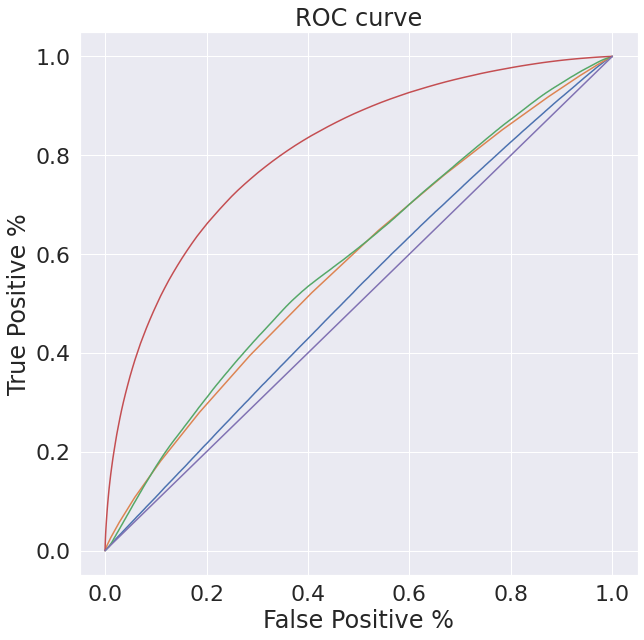

In [74]:
# Plot ROC data
plt.figure(figsize=(10,10))
sns.set(font_scale=2)
lg = plt.plot(lg_fpr, lg_tpr)
knn = plt.plot(knn_fpr, knn_tpr)
gnb = plt.plot(gauss_fpr, gauss_tpr)
rf = plt.plot(rf_fpr, rf_tpr)
plt.plot([0,1],[0,1])


plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False Positive %')
plt.ylabel('True Positive %')
plt.title('ROC curve');
plt.show()